In [2]:
# Mounting Google Drive
from google.colab import drive 
drive.mount('/content/drive/')

rootDir = '/content/drive/MyDrive/deepLearningProject-main/*'

!cp -r $rootDir .

!pip install --upgrade --no-cache-dir gdown

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# import libraries

from libs.MSCTDdataset import MSCTD
from torch.utils.data import Dataset, DataLoader
from libs.transforms import Compose,toTensor,resize
from torchvision.transforms import ToTensor, Resize
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor, Resize, Compose
from torchvision.models import resnet50, ResNet50_Weights
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import PIL 
import os

from libs.MSCTDdataset import MSCTD
from torch.utils.data import Dataset, DataLoader
from libs.transforms import Compose,toTensor,resize
from torchvision.transforms import ToTensor, Resize
import torch
import torch.nn as nn
import torchtext
from torchvision.transforms import ToTensor, Resize, Compose
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import PIL 
import os
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
# download flickr8k dataset(image-Captioning dataset)

import opendatasets as od
  
od.download("https://www.kaggle.com/datasets/adityajn105/flickr8k")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: farahmandalizadeh
Your Kaggle Key: ··········


100%|██████████| 1.04G/1.04G [00:46<00:00, 23.9MB/s]


In [30]:
## read captions and save them in dataframe

read_file = pd.read_csv (r'/content/flickr8k/captions.txt')
read_file.to_csv (r'temp.csv', index=None)

In [31]:
df = pd.read_csv('temp.csv')

In [32]:
df

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...
40450,997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,A man is rock climbing high in the air .
40452,997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,A rock climber in a red shirt .


In [45]:
# each image has multiple captions we used first ones
df2 = df.drop_duplicates(subset='image', keep="first")

In [66]:
df2 = df2.reset_index(drop=True)

In [68]:
# drop image column that represent image id that caption releted to
df2 = df2.drop('image', axis=1)

In [69]:
df2

,caption
0,A child in a pink dress is climbing up a set o...
1,A black dog and a spotted dog are fighting
2,A little girl covered in paint sits in front o...
3,A man lays on a bench while his dog sits by him .
4,A man in an orange hat starring at something .
...,...
8086,A man does a wheelie on his bicycle on the sid...
8087,A group is sitting around a snowy crevasse .
8088,A grey bird stands majestically on a beach whi...
8089,A person stands near golden walls .


In [70]:
# convert dataframe text
df2.to_csv(r'text.txt', header=None, index=None, sep=' ', mode='a')

In [71]:
# remove quotation marks
with open('text.txt', 'r') as f, open('text2.txt', 'w') as fo:
    for line in f:
        fo.write(line.replace('"', '').replace("'", ""))

In [62]:
# rename every images to read it properly
folder = "/content/flickr8k/Images/"
ldseg = np.array(os.listdir(folder))
ldseg = np.sort(ldseg)

for count, filename in enumerate(ldseg):
    dst = f"{str(count)}.jpg"
    src =f"{folder}/{filename}"  
    dst =f"{folder}/{dst}"
    os.rename(src, dst)


In [77]:
training_data_single = MSCTD(mode='train', download=True, transformer=Compose([resize(dstsize=(224,224))]),root_dir="/content",read_mode="single")
valid_data_single = MSCTD(mode='validation',  download=True, transformer=Compose([resize(dstsize=(224,224))]),root_dir="/content",read_mode="single")
test_data_single = MSCTD(mode='test',  download=True, transformer=Compose([resize(dstsize=(224,224))]),root_dir="/content",read_mode="single")

Downloading...
From: https://drive.google.com/uc?id=1YKspGKHRYeg5nq7AW_pV5OQpP8K6OkBk
To: /content/Datasets/train.zip
100%|██████████| 2.90G/2.90G [00:15<00:00, 184MB/s]
Downloading...
From: https://drive.google.com/uc?id=1b8FsEcrLCb_hk29bpddjjJ4ylq6naRuQ
To: /content/Datasets/validation.zip
100%|██████████| 638M/638M [00:13<00:00, 49.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=17z3HSnSCrNhwwgJyTz5-oSKwkqGw_7VR
To: /content/Datasets/test.zip
100%|██████████| 641M/641M [00:13<00:00, 46.2MB/s]


In [75]:
# crate and read flickr8k dataset output :(image,caption)
from libs.MSCTDdataset2 import MSCTD2
unlabeled_data = MSCTD2(mode='train', download=True, transformer=Compose([resize(dstsize=(224,224))]),root_dir="",read_mode="single")

In [78]:
# train valid test and unlabeled dataloader
batch_size = 64
train_dataloader = DataLoader(training_data_single, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_data_single, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data_single, batch_size=batch_size, shuffle=True)
unlabeled_dataloader = DataLoader(unlabeled_data, batch_size=batch_size, shuffle=True)

In [79]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 101.2 MB/s eta 0:00:00


In [80]:
from transformers import AutoModel, AdamW
from torch import nn
# phase 2 text model (bert)
class TextClassifier(nn.Module):
  def __init__(self):
    super(TextClassifier, self).__init__()
    self.bert = AutoModel.from_pretrained('bert-base-uncased')
    self.fc1 = nn.Linear(768, 32)
    self.fc2 = nn.Linear(32, 3)
  
  def forward(self, input_ids, attention_mask):
    temp = input_ids
    temp = self.bert(input_ids, attention_mask=attention_mask)[1]
    temp = self.fc1(temp)
    temp = self.fc2(temp)
    return temp

In [81]:
text_model = TextClassifier()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [82]:
# load phase 2's (text)model (parameters)

pre_trained_path = '/content/drive/MyDrive/phase2_part4_model (1).pth'
state_dict = torch.load(pre_trained_path)
text_model.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
text_model.eval()

In [84]:
weights = ResNet50_Weights.DEFAULT
image_model = resnet50(weights=weights)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [85]:
# add fc layer 

image_model.fc = nn.Linear(2048,3)

In [86]:
# load phase 1 model (parameters)

pre_trained_path = '/content/drive/MyDrive/part2_model.pth'
state_dict = torch.load(pre_trained_path, map_location=torch.device('cpu'))
image_model.load_state_dict(state_dict)


<All keys matched successfully>

In [ ]:
image_model.train()

In [88]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
image_model.to(device)
text_model.to(device)

In [90]:
# freeze backbone model
for param in image_model.parameters():
    param.requires_grad = False

In [91]:
for name, param in image_model.named_parameters():
     if 'fc' in name:
         param.requires_grad = True

In [ ]:
for name, param in image_model.named_parameters():
    print(name, param.requires_grad)

In [93]:
# hyperparameters

learning_rate = 1e-3
epochs = 3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(image_model.parameters(), lr=learning_rate)

In [94]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", use_fast=True)

In [114]:
# create dataset for text model
import torch

class MSDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


In [96]:
# test trained image model on MSCTD test data before training on flickr dataset(unlabeled)

y_pred = []
y_true = []
image_model.eval()
with torch.no_grad():
    for (X, temp1, y, temp2)  in test_dataloader:
        X = torch.permute(X[0],(0,3,1,2)).float()
        X = X.to(device)
        y = torch.squeeze(torch.Tensor(np.array(y).astype(int)).to(torch.long))
        y = y.to(device)
        pred = image_model(X)
        output = pred.argmax(1).cpu().numpy()
        y_pred.extend(output)
        label = y.cpu().numpy()
        y_true.extend(label)

In [97]:
print(classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.26      0.39      0.31      1298
           1       0.44      0.57      0.50      2163
           2       0.37      0.08      0.13      1606

    accuracy                           0.37      5067
   macro avg       0.36      0.35      0.31      5067
weighted avg       0.37      0.37      0.33      5067



In [117]:
from torch.utils.data import DataLoader

def train_loop(dataloader, image_model, text_model ,loss_fn, optimizer,tokenizer, MSDataset):
    size = len(dataloader.dataset)
    image_model.train()
    text_model.eval()
    for i, (X, text) in enumerate(dataloader): 
        # Compute prediction and loss 
        X = torch.permute(X[0],(0,3,1,2)).float()  #get image batch to train image model
        X = X.to(device)
        
        text = list(text[0]) # get text batch to predict their labels by text mode(psuedo label)
        valid_encodings = tokenizer(text, truncation=True, padding=True, max_length=512) # tokenize text with padding
   
        label = [0]*len(X) # fake labels just to pass them to MSdataset we don't use them
        
        valid_dataset = MSDataset(valid_encodings, label)
        valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False) # text dataloader 
        for batch in valid_loader:

            input_ids = batch['input_ids'].to(device) # text model inputs
            attention_mask = batch['attention_mask'].to(device)
            outputs = text_model(input_ids, attention_mask=attention_mask)
            outputs = outputs.to(device)  # text model output (psuedo labels)
         # image model ouput 
        pred = image_model(X)     
        y = outputs.argmax(1) 
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            loss, current = loss.item(), i * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # test model on each epoch
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    model.eval()
    with torch.no_grad():
        for (X, temp1, y, temp2) in dataloader:
            X = torch.permute(X[0],(0,3,1,2)).float() # get image batch
            X = X.to(device)
            y = torch.squeeze(torch.Tensor(np.array(y).astype(int)).to(torch.long)) #get batch labels
            y = y.to(device)
            pred = model(X) #predict label
            test_loss += loss_fn(pred, y).item() # compute loss
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() 

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [118]:
# train loop 
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(unlabeled_dataloader, image_model, text_model, loss_fn, optimizer, tokenizer, MSDataset)
    test_loop(test_dataloader, image_model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.225438  [    0/ 8091]
loss: 0.214529  [ 6400/ 8091]
Test Error: 
 Accuracy: 25.6%, Avg loss: 0.045593 

Epoch 2
-------------------------------
loss: 0.252984  [    0/ 8091]
loss: 0.204081  [ 6400/ 8091]
Test Error: 
 Accuracy: 25.7%, Avg loss: 0.039760 

Epoch 3
-------------------------------
loss: 0.351443  [    0/ 8091]
loss: 0.263881  [ 6400/ 8091]
Test Error: 
 Accuracy: 25.7%, Avg loss: 0.041754 

Done!


In [119]:
# test image model on MSCTD test data after training on flickr dataset(unlabeled)

y_pred = []
y_true = []
image_model.eval()
with torch.no_grad():
    for (X, temp1, y, temp2)  in test_dataloader:
        X = torch.permute(X[0],(0,3,1,2)).float()
        X = X.to(device)
        y = torch.squeeze(torch.Tensor(np.array(y).astype(int)).to(torch.long))
        y = y.to(device)
        pred = image_model(X)
        output = pred.argmax(1).cpu().numpy()
        y_pred.extend(output)
        label = y.cpu().numpy()
        y_true.extend(label)

In [31]:
# print classification report

print(classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.31      0.15      0.20      1298
           1       0.44      0.81      0.57      2163
           2       0.37      0.10      0.16      1606

    accuracy                           0.42      5067
   macro avg       0.37      0.35      0.31      5067
weighted avg       0.38      0.42      0.35      5067



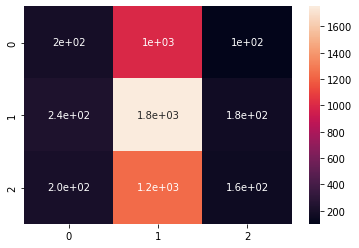

In [32]:
# plot confusion matrix

cf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
sb.heatmap(cf_matrix, annot=True)
plt.show()

In [ ]:
torch.save(image_model.state_dict(), 'phase3_part2_image_model.pth')

We use flickr8 images and caption. first preprocess captions and produce psuedo labels(text model's outputs) then use these labels to train image model. after training image model, test image model on MSCTD test data. as you can we get better accuracy. because model train on another dataset which has different distribution from MSCTD dataset and image model generalizes better.  